In [1]:
import datetime
from glob import glob
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from keras import layers
from keras.layers import Input, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D
from keras.models import Model

training_data_path = r"C:\Tutorial\ToolsTraining"
testing_data_path = r"C:\Tutorial\ToolsTesting"

model_save_path = r"C:\Tutorial\SavedModels"
notebook_save_path = r"C:\Tutorial\SavedNotebooks"

classes = ['1', '2', '3', '4', 'None']

resized_image_size = 128

if not os.path.exists(training_data_path):
    print("Could not find folder: " + training_data_path)
    raise

if not os.path.exists(testing_data_path):
    print("Could not find folder: {}".format(testing_data_path))
    raise

Using TensorFlow backend.


In [2]:
from sklearn.model_selection import train_test_split

training_globs = []
testing_globs = []

num_classes = len(classes)

print("Number of classes: {}".format(num_classes))

for i in range(num_classes):
    training_class_path = os.path.join(training_data_path, classes[i])
    testing_class_path = os.path.join(testing_data_path, classes[i])
    
    training_class_glob = glob(os.path.join(training_class_path, "*.png"))
    testing_class_glob = glob(os.path.join(testing_class_path, "*.png"))
    
    training_globs.append(training_class_glob)
    testing_globs.append(testing_class_glob)

Number of classes: 5


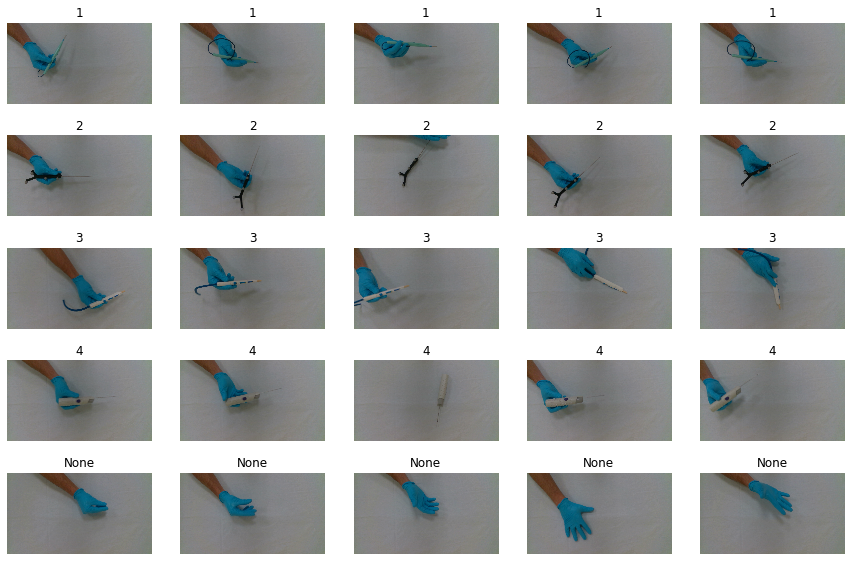

In [29]:
# Show sample images of all classes

num_choices = 5
random_choices = []
labels = []

for i in range(num_classes):
    random_choice = np.random.choice(training_globs[i], num_choices)
    random_choices.append(random_choice)
    labels.append(num_choices * [classes[i]])

plt.figure(figsize=(3*num_choices,2*num_classes))

for class_index in range(num_classes):
    for choice_index in range(num_choices):
        im = Image.open(random_choices[class_index][choice_index]).convert('RGB')
        plt.subplot(num_classes, num_choices, class_index * num_choices + choice_index + 1)
        plt.title(labels[class_index][choice_index])
        plt.imshow(np.asarray(im))
        plt.axis('off')        

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input

batch_size = 32

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.05,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.05,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    training_data_path,
    target_size=(resized_image_size, resized_image_size),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = train_datagen.flow_from_directory(
    testing_data_path,
    target_size=(resized_image_size, resized_image_size),
    batch_size=batch_size,
    class_mode='categorical')



Found 2381 images belonging to 5 classes.
Found 120 images belonging to 5 classes.


In [46]:
x = train_generator.next()[0][0]
y = train_generator.next()[0][1]
print(x.shape)
print(np.max(x))
print(np.min(x))
print(y)

(128, 128, 3)
0.06983173
-0.26298976
[[[ 0.03740346  0.0708853   0.09109712]
  [ 0.03604531  0.05957472  0.08310413]
  [ 0.03499985  0.05446064  0.09019613]
  ...
  [-0.06607598  0.01117396 -0.09685785]
  [-0.06429958  0.00939763 -0.09330505]
  [-0.06252325  0.00762129 -0.08975232]]

 [[ 0.04269028  0.08145893  0.09990859]
  [ 0.03252077  0.05605018  0.07957959]
  [ 0.03852439  0.05974746  0.09019613]
  ...
  [-0.05817616  0.00456905 -0.08235294]
  [-0.05462337  0.00812173 -0.08235294]
  [-0.05107057  0.01167452 -0.08235294]]

 [[ 0.04797709  0.09203267  0.10872006]
  [ 0.02899623  0.05252564  0.07605505]
  [ 0.04204905  0.06503427  0.09019613]
  ...
  [-0.04336411  0.01949441 -0.08252305]
  [-0.0504697   0.01594162 -0.08785224]
  [-0.05757517  0.01238883 -0.09318143]]

 ...

 [[ 0.00021386  0.05098045 -0.03130126]
  [ 0.00554311  0.05098045 -0.02952486]
  [ 0.01087213  0.05098045 -0.02774853]
  ...
  [ 0.01413119  0.00628805  0.00865448]
  [ 0.01176476  0.00392163  0.01678443]
  [ 0.0

In [5]:
def HappyModel():
    X_input = Input(shape = (resized_image_size, resized_image_size, 3), name = 'X_input')
 
    X = Conv2D(8, (3, 3), strides = (1,1) , padding = 'valid')(X_input)
    X = MaxPooling2D(pool_size = (2, 2))(X)
 
    X = Conv2D(16, (3, 3), strides = (1,1) , padding = 'valid')(X)
    X = Conv2D(32, (3, 3), strides = (1,1) , padding = 'valid')(X)
    X = MaxPooling2D(pool_size = (2, 2))(X)
    
    X = Conv2D(64, (3, 3), strides = (1,1) , padding = 'valid')(X)
    X = Conv2D(128, (3, 3), strides = (1,1) , padding = 'valid')(X)
    X = MaxPooling2D(pool_size = (2, 2))(X)
 
    X = Flatten()(X)

    X = Dense(num_classes * 8 + 20, input_shape = (29 * 29 * 16, 1))(X)
    X = Activation('relu')(X)
    X = Dropout(0.4)(X)
 
    X = Dense(num_classes * 4 + 10)(X)
    X = Activation('relu')(X)
 
    X = Dense(num_classes)(X)
    X = Activation('softmax')(X)
    
    return Model([X_input], [X])

model = HappyModel()

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
X_input (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 8)       224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 16)        1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 59, 59, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 27, 64)        1849

In [6]:
num_epochs = 20
steps_per_epoch = int(train_generator.n / batch_size)
validation_steps = int(test_generator.n / batch_size)

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

training_time_start = datetime.datetime.now()

history = model.fit_generator(
    train_generator,
    epochs=num_epochs,
    steps_per_epoch=steps_per_epoch,
    validation_data=test_generator,
    validation_steps=validation_steps)

Epoch 1/20
74/74 [==============================] - 171s 2s/step - loss: 0.4355 - accuracy: 0.8187 - val_loss: 0.3957 - val_accuracy: 0.8333
Epoch 2/20
74/74 [==============================] - 97s 1s/step - loss: 0.3559 - accuracy: 0.8415 - val_loss: 0.2882 - val_accuracy: 0.8705
Epoch 3/20
74/74 [==============================] - 94s 1s/step - loss: 0.3171 - accuracy: 0.8584 - val_loss: 0.2772 - val_accuracy: 0.8682
Epoch 4/20
74/74 [==============================] - 93s 1s/step - loss: 0.2805 - accuracy: 0.8742 - val_loss: 0.2662 - val_accuracy: 0.8727
Epoch 5/20
74/74 [==============================] - 95s 1s/step - loss: 0.2484 - accuracy: 0.8914 - val_loss: 0.1451 - val_accuracy: 0.9021
Epoch 6/20
74/74 [==============================] - 97s 1s/step - loss: 0.2263 - accuracy: 0.9013 - val_loss: 0.1671 - val_accuracy: 0.9182
Epoch 7/20
74/74 [==============================] - 93s 1s/step - loss: 0.2009 - accuracy: 0.9148 - val_loss: 0.1405 - val_accuracy: 0.9318
Epoch 8/20
74/74 [=

In [7]:
training_time_stop = datetime.datetime.now()
print("Training started at: {}".format(training_time_start))
print("Training stopped at: {}".format(training_time_stop))
print("Total training time: {}".format(training_time_stop-training_time_start))

Training started at: 2020-03-12 12:23:00.866539
Training stopped at: 2020-03-12 13:07:36.861586
Total training time: 0:44:35.995047


0.20350325
-1.0
Max/min:  0.12156868 -0.91362023
(1, 128, 128, 3)
Max/min:  0.16824746 -1.0
(1, 128, 128, 3)
Max/min:  0.1840657 -1.0
(1, 128, 128, 3)
Max/min:  0.105882406 -1.0
(1, 128, 128, 3)
Max/min:  0.11245668 -1.0
(1, 128, 128, 3)


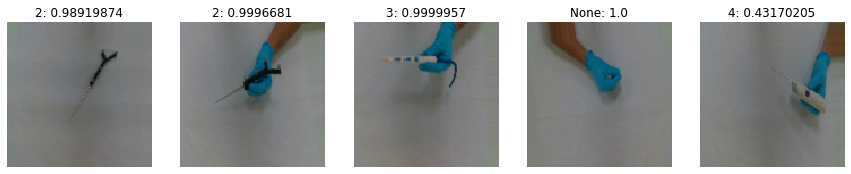

In [33]:
test_generator.reset()
x,y = test_generator.next()
print(np.max(x))
print(np.min(x))

num_choices = 5
test_indices = range(batch_size)

random_choice = np.random.choice(test_indices, num_choices)

plt.figure(figsize=(3*num_choices, 3))

for i in range(num_choices):
    im = x[random_choice[i]][:,:,:]
    print('Max/min: ', np.max(im), np.min(im))
    prediction = model.predict(np.expand_dims(im, 0))
    plt.subplot(1, num_choices, i+1)
    max_index = np.argmax(prediction[0])
    plt.title(str(classes[max_index]) + ": " + str(prediction[0][max_index]))
    plt.imshow((im + 1)/2)
    plt.axis('off')
    print(np.expand_dims(im, 0).shape)


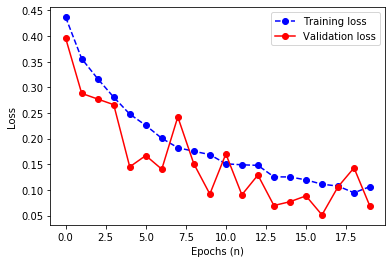

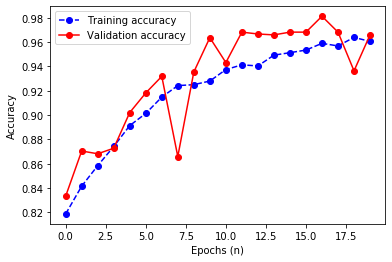

In [11]:
plt.plot(history.history['loss'], 'bo--')
plt.plot(history.history['val_loss'], 'ro-')
plt.ylabel('Loss')
plt.xlabel('Epochs (n)')
plt.legend(['Training loss', 'Validation loss'])
plt.show()
plt.plot(history.history['accuracy'], 'bo--')
plt.plot(history.history['val_accuracy'], 'ro-')
plt.ylabel('Accuracy')
plt.xlabel('Epochs (n)')
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.show()

In [12]:
timestamp = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

if not os.path.exists(model_save_path):
    os.makedirs(model_save_path)
    print("Creating folder: {}".format(model_save_path))

model_file_name = "model_" + timestamp + ".h5"
model_file_fullname = os.path.join(model_save_path, model_file_name)

model.save(model_file_fullname)
print("Model saved to: {}".format(model_file_fullname))

notebook_file_name = "notebook_" + timestamp + ".html"
notebook_file_fullpath = os.path.join(notebook_save_path, notebook_file_name)

if not os.path.exists(notebook_save_path):
    os.makedirs(notebook_save_path)
    print("Creating folder: {}".format(notebook_save_path))

os.system("jupyter nbconvert --to html TrainHappyModel.ipynb --output " + notebook_file_fullpath)

print("Notebook saved to: {}".format(notebook_file_fullpath))

Model saved to: F:\DGMATO\ToolDetection_Video_DL\Data\SavedModels\model_2020-03-12_13-08-34.h5
Notebook saved to: F:\DGMATO\ToolDetection_Video_DL\Data\SavedNotebooks\notebook_2020-03-12_13-08-34.html


In [18]:
weights = model.get_weights()
print (weights)


[array([[[[-0.02078079,  0.02393437,  0.21101922,  0.22888872,
           0.00440301, -0.02123244,  0.18310282,  0.08578529],
         [ 0.18849483,  0.24017392,  0.00566306, -0.07792215,
           0.03269995,  0.17732224, -0.20396267, -0.13794793],
         [-0.26044452,  0.21550533,  0.11730213,  0.2915969 ,
           0.19749449, -0.05790331,  0.15470396,  0.27006334]],

        [[ 0.23077619,  0.05549669, -0.1837343 ,  0.22641547,
           0.05694728,  0.11556467, -0.11333036, -0.11553697],
         [-0.05893704, -0.01089978,  0.05429395,  0.025853  ,
           0.27290905,  0.0679923 , -0.24349652, -0.03806014],
         [ 0.09665865,  0.18253477, -0.10923395, -0.13686152,
          -0.01433242, -0.04709112, -0.01000599, -0.10952538]],

        [[ 0.02499898, -0.26291183, -0.17485411, -0.19544524,
           0.11439392, -0.21564674,  0.03193633,  0.16614315],
         [ 0.05702163,  0.0340632 , -0.03437572, -0.24226946,
           0.12918386, -0.262587  ,  0.19424975, -0.226533